In [21]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import seaborn as sns
import sympy as sp

from sympy.plotting import plot
from sympy import Symbol
from sympy import Matrix
from sympy import *
from scipy.spatial import ConvexHull
from __future__ import division

In [22]:
#read datafiles
#df = pd.read_csv('./numerical_continuation_activeset.csv')
#df_F = pd.read_csv('./numerical_continuation_F_lower.csv')
#df_G = pd.read_csv('./numerical_continuation_G_lower.csv')
df = pd.read_csv('./numerical_continuation_activeset_test.csv')
df_F = pd.read_csv('./numerical_continuation_activeset_F.csv')
df_G = pd.read_csv('./numerical_continuation_activeset_G.csv')
df

,zeta,omega_ratio,solution_1,solution_2,solution_3,p1,p2,p3,p4,p5,...,p991,p992,p993,p994,p995,p996,p997,p998,p999,p1000
0,0.010001,1.00,1.000001,8.240000e-07,8.240000e-07,0,9.570000e-07,0.000003,0.000008,0.000013,...,0.000063,0.000049,0.000038,0.000028,0.000019,0.000012,0.000007,0.000003,6.250000e-07,-6.460000e-21
1,0.020001,1.00,1.000001,8.240000e-07,8.240000e-07,0,1.750000e-06,0.000007,0.000015,0.000026,...,0.000127,0.000100,0.000076,0.000056,0.000039,0.000025,0.000014,0.000006,1.420000e-06,-6.460000e-21
2,0.030001,1.00,1.000001,8.240000e-07,8.240000e-07,0,2.540000e-06,0.000010,0.000022,0.000039,...,0.000191,0.000150,0.000115,0.000084,0.000058,0.000037,0.000021,0.000009,2.210000e-06,-6.460000e-21
3,0.030001,1.01,1.001474,-9.775540e-04,-4.942160e-04,0,2.510000e-06,0.000010,0.000023,0.000041,...,0.000155,0.000125,0.000098,0.000073,0.000052,0.000034,0.000019,0.000009,2.140000e-06,-5.330000e-21
4,0.040001,1.00,1.000001,8.240000e-07,8.240000e-07,0,3.330000e-06,0.000013,0.000029,0.000051,...,0.000255,0.000201,0.000154,0.000113,0.000078,0.000050,0.000028,0.000012,3.000000e-06,-6.460000e-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527,0.990001,1.40,1.066242,-6.878372e-02,2.543287e-03,0,4.560000e-05,0.000175,0.000391,0.000697,...,0.002814,0.002251,0.001744,0.001296,0.000909,0.000586,0.000331,0.000146,3.450000e-05,-1.940000e-19
4528,0.990001,1.41,1.066600,-6.875906e-02,2.160176e-03,0,2.900000e-05,0.000140,0.000337,0.000623,...,0.002859,0.002303,0.001800,0.001352,0.000962,0.000633,0.000369,0.000174,4.940000e-05,4.200000e-19
4529,0.990001,1.42,1.066785,-6.875426e-02,1.970339e-03,0,5.150000e-05,0.000185,0.000404,0.000713,...,0.002623,0.002099,0.001625,0.001204,0.000841,0.000538,0.000299,0.000128,2.660000e-05,-3.230000e-18
4530,0.990001,1.43,1.067057,-6.870294e-02,1.647646e-03,0,4.720000e-05,0.000175,0.000388,0.000691,...,0.002581,0.002071,0.001609,0.001197,0.000840,0.000541,0.000304,0.000132,2.970000e-05,-2.390000e-19


In [39]:
#Calculate Work-loop

#Boundary

#find upper-bound
df_upper = df.groupby(by='zeta',as_index=False).max('omega_ratio')#,'solution_4','solution_5','solution_6', 'power']].groupby(by='zeta',as_index=False).max()
df_upper_F = df_F.groupby(by='zeta',as_index=False).max('omega_ratio')#,'solution_4','solution_5','solution_6', 'power']].groupby(by='zeta',as_index=False).max()
df_upper_G = df_G.groupby(by='zeta',as_index=False).max('omega_ratio')#,'solution_4','solution_5','solution_6', 'power']].groupby(by='zeta',as_index=False).max()
#df_upper

#find lower-bound
df_lower = df.groupby(by='zeta',as_index=False).min('omega_ratio')#,'solution_4','solution_5','solution_6','power']].groupby(by='zeta',as_index=False).min()
df_lower_F = df_F.groupby(by='zeta',as_index=False).min('omega_ratio')#,'solution_4','solution_5','solution_6','power']].groupby(by='zeta',as_index=False).min()
df_lower_G = df_G.groupby(by='zeta',as_index=False).min('omega_ratio')#,'solution_4','solution_5','solution_6','power']].groupby(by='zeta',as_index=False).min()
#df_lower

#allocate values
zeta = np.array(df_upper.zeta,np.float64)
OR = np.array(df_upper.omega_ratio,np.float64)
a1 = np.array(df_upper.solution_1,np.float64)
a2 = np.array(df_upper.solution_2,np.float64)
a3 = np.array(df_upper.solution_3,np.float64)

df_power = df_upper.iloc[:, ~df.columns.isin(['zeta','omega_ratio','solution_1','solution_2','solution_3'])]
power = np.array(df_power,np.float64)

df_Fnew = df_upper_F.iloc[:, ~df.columns.isin(['zeta','omega_ratio','solution_1','solution_2','solution_3'])]
F = np.array(df_Fnew,np.float64)

df_Gnew = df_upper_G.iloc[:, ~df.columns.isin(['zeta','omega_ratio','solution_1','solution_2','solution_3'])]
G = np.array(df_Gnew,np.float64)

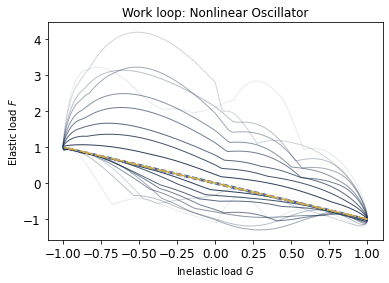

In [45]:
#Plot
index = len(zeta)

for i in [10,20,30,40,50,60,70,80,90]:   
    plt.plot(-F[i],G[i],c= "#172c4b",alpha=1-0.01 * i, linewidth=1,linestyle = '-')

plt.plot(-F[0],G[0],c= "#3b65ac",alpha=1, linewidth=1.5,linestyle = '--')
plt.plot(-F[0],F[0],c= "#cba74e",alpha=1, linewidth=1.5,linestyle = '-.')   

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel( r"Inelastic load $G$")
plt.ylabel(r"Elastic load $F$")
plt.title('Work loop: Nonlinear Oscillator')
plt.savefig('workloop-Nonlinear(2).svg',format='svg',dpi=600)
plt.show()

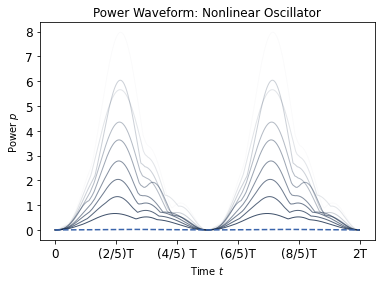

In [46]:
 for i in [18,28,38,48,58,68,78,88,98]:    
    plt.plot(power[i],c= "#172c4b",alpha=1-0.01 * i, linewidth=1,linestyle = '-')
plt.plot(power[0],c= "#3b65ac",alpha=1, linewidth=1.5,linestyle = '--')

ax = plt.gca()
plt.xticks([0, 200, 400, 600, 800, 1000],['0', '(2/5)T', '(4/5) T', '(6/5)T', '(8/5)T','2T'])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel( r"Time $t$")
plt.ylabel(r"Power $p$")
plt.title('Power Waveform: Nonlinear Oscillator')
plt.savefig('power-Nonlinear.svg',format='svg',dpi=600)
plt.show()